### 농어(perch)의 길이 데이터를 통해 농어 무게 예측하는 모델 만들기

* K-NN(K-Nearest Neighbor) Regression (K-최근접 이웃 회귀)
* Coefficient of Determination ($ R^2$) (결정 계수)
* Overfitting vs. Underfitting

# 1. 데이터 준비

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     ) # 농어 길이에 해당하는 값의 리스트 - np.array에 전달

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     ) # 농어 무게에 해당하는 값의 리스트 - np.array에 전달


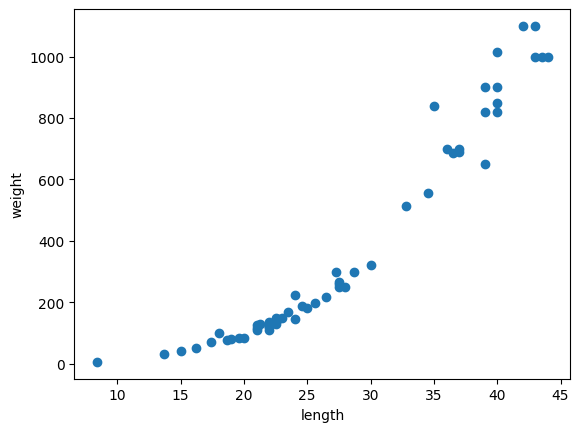

In [2]:
import matplotlib.pyplot as plt
     # Data Visualization

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
    # 훈련 데이터와 테스트 데이터 분리하기
    
train_data, test_data, train_target, test_target = train_test_split(perch_length, 
                                                                    perch_weight, 
                                                                    random_state = 42)
    # 농어 길이 데이터로 무게를 예측할거니까 X = 길이, target = 무게
print(train_data.shape, test_data.shape)

(42,) (14,)


##### numpy 
- `np.reshape()` method: 바꾸려는 배열의 크기 지정하기
    - (4,) 크기의 배열을 (2,2)로 바꿀 수 있다.
    - 특징에 대한 데이터는 2차원 배열, 타겟에 대한 데이터는 1차원 배열.
    - 1차원 배열인 데이터를 2차원 배열로 바꿔줄 때 사용할 수 있다.
    - `np.reshape(-1,1)`: 2차원 배열로 변경할건데 행의 자리의 -1은 열의 값을 특정 정수-이 경우에는 1-로 지정이 되어있을 때 남은 배열의 길이와 남은 차원으로부터 추정해서 알아서 행을 지정하라는 의미

In [4]:
# not neccessary 
test_array = np.array([1,2,3,4]) # 1행 4열 리스트를 np.array에 전달하면 세로로 늘어진 np 배열 얻는다.
print(test_array.shape) # output = (4, ) 객체의 형태가 1열의 4행 넘파이 배열이라는 의미

test_array = test_array.reshape(2,2) # 객체의 형태를 2열의 2행 넘파이 배열로 reshape
print(test_array.shape) # output = (2, 2)

(4,)
(2, 2)


In [5]:
print(train_data)
print(test_data)
# perch_length, perch_weight 리스트가 1차원 배열을 가졌기 때문에
# train_data, test_data도 1차원 배열을 가진다.
    # train_data.shape -> (42,)
    # test_data.shape -> (14,)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]


In [6]:
train_data = train_data.reshape(-1,1) # 2차원 배열로 변경하기
test_data = test_data.reshape(-1,1) # 2차원 배열로 변경하기

In [7]:
print(train_data.shape, test_data.shape) # 2차원 배열로 바뀌었는지 확인

(42, 1) (14, 1)


# 2. 모델 학습 (K-Nearest Neighbor Regression)

In [8]:
from sklearn.neighbors import KNeighborsRegressor
    # scikit-learn 에서 K-NN regression - import
    
knr = KNeighborsRegressor() # 객체 지정
knr.fit(train_data, train_target) # 훈련 세트를 모델 객체에 전달해 모델 학습시키기

KNeighborsRegressor()

## 2-1. Coefficient of Determination ($ R^2$)
- 분류 모델에서는 정확도를 산출하고, 회귀 모델에서는 상관계수를 산출한다.

In [9]:
print(knr.score(train_data, train_target))
print(knr.score(test_data, test_target))
    # 모델 학습이 잘 되었는지 확인하기 위해 상관계수 확인 

0.9698823289099254
0.992809406101064


## 2-2. Mean Absolute Error (MAE)
- 분류 모델의 정확도만큼 $R^2$가 얼마나 좋은 값인지 이해하기 어렵다. 따라서, 타겟과 예측한 값 사이의 차이를 구해보면 어느정도 예측이 벗어났는지 가늠하기 좋다. 이때 사용하는 것이 sklearn 패키지에 있는 `mean_absolute_error` 이다.
- `mean_absolute_error`: 타겟과 예측의 절댓값 오차를 평균하여 반환한다.

In [10]:
from sklearn.metrics import mean_absolute_error
    # 평균 절댓값 오차를 사용하기 위해 scikit에서 mae 호출
    
test_predict = knr.predict(test_data) # 테스트 세트에 대한 예측 만들기
mae = mean_absolute_error(test_target, test_predict) # 테스트 세트의 mae 계산하기
print(mae)

19.157142857142862


- **예측이 평균적으로 19g 정도 타겟값과 다르다**

# 3. Overfitting vs. Underfitting

- 과대적합 (overfitting): 훈련세트에서 점수가 굉장히 좋았는데 테스트 세트에서 점수가 굉장히 나쁠 때
- 과소적합 (underfitting): 테스트 세트의 점수가 더 높거나 두 점수가 모두 너무 낮을 때, 데이터 세트의 크기가 매우 작을 때
- 모델을 복잡하게 만들면 이러한 과적합 문제를 해결할 수 있다. **K-NN 알고리즘으로 모델을 더 복잡하게 만들려면 이웃의 갯수를 줄이는 것이다. 이웃의 갯수를 줄이면 훈련 세트의 국지적 패턴에 민감해지고, 이웃의 갯수를 늘리면 데이터 전반의 일반적인 패턴에 따를 것이다. n_neighbors의 기본값은 5이다.**

In [11]:
print(knr.score(train_data, train_target))
print(knr.score(test_data, test_target))
# overfitting

0.9698823289099254
0.992809406101064


### 3-1. 모델 재훈련 (n_neighbors = 3)

In [12]:
knr.n_neighbors = 3
knr.fit(train_data, train_target) # 이웃의 수를 재설정 했으니 모델 재훈련

print(knr.score(train_data, train_target)) # 훈련 데이터의 스코어 구하기
print(knr.score(test_data, test_target)) # 테스트 데이터의 스코어 구하기

0.9804899950518966
0.9746459963987609


In [13]:
### 3-2. 이웃의 수 조절해보기 (연습)

In [14]:
knr.n_neighbors = 10
knr.fit(train_data, train_target)
print(knr.score(train_data, train_target))
print(knr.score(test_data, test_target))

# 테스트 데이터 스코어가 더 높아서 underfitting

0.96164569026043
0.9737908255822255


In [15]:
knr.n_neighbors = 5
knr.fit(train_data, train_target)
print(knr.score(train_data, train_target))
print(knr.score(test_data, test_target))

# 테스트 데이터 스코어가 더 높아서 underfitting

0.9698823289099254
0.992809406101064


In [16]:
knr.n_neighbors = 7
knr.fit(train_data, train_target)
print(knr.score(train_data, train_target))
print(knr.score(test_data, test_target))

# 적합!

0.9761170732051527
0.9781383949643516


# 실습

훈련 세트 스코어:  0.9852830341215901


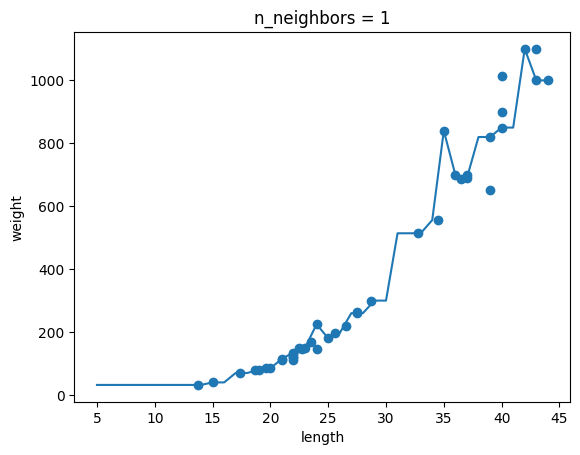

훈련 세트 스코어:  0.9804899950518966


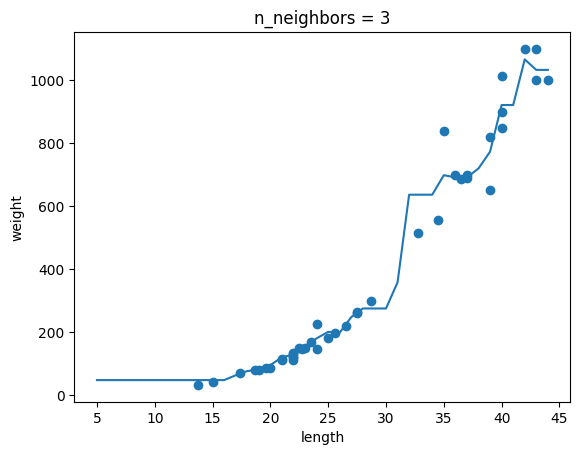

훈련 세트 스코어:  0.9698823289099254


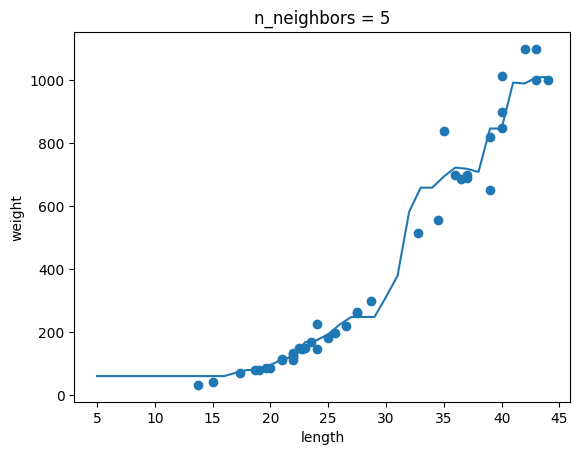

훈련 세트 스코어:  0.9761170732051527


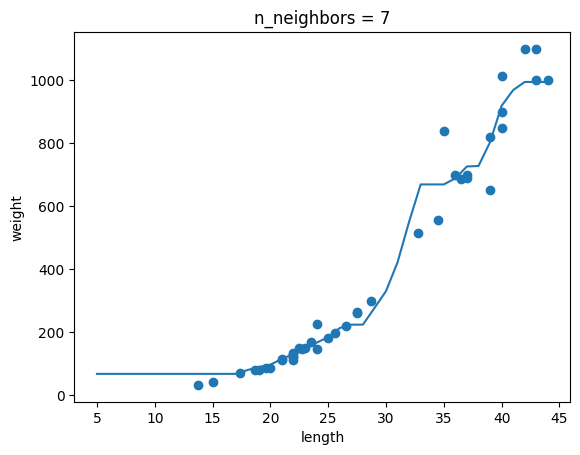

훈련 세트 스코어:  0.96164569026043


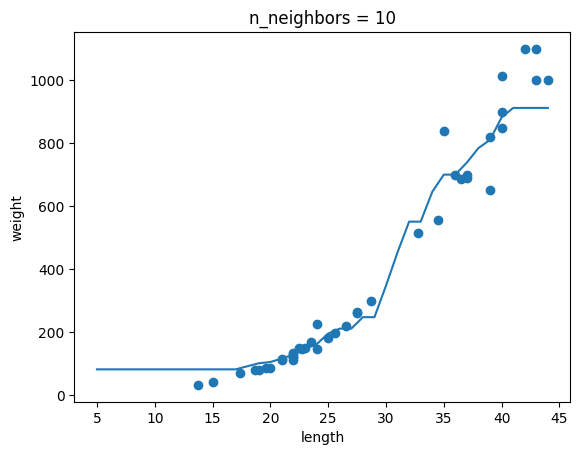

In [17]:
knr = KNeighborsRegressor() # k-최근접 이웃 회귀 객체 만들기 
x = np.arange(5, 45).reshape(-1, 1) # 5에서 45까지 x 좌표를 만들고, 2차원 배열로 만들기

for n in [1, 3, 5, 7, 10]: # 이웃의 갯수가 1, 5, 10일 때 예측 결과를 그래프로 그리기
    knr.n_neighbors = n
    knr.fit(train_data, train_target) # 모델 훈련
    print('훈련 세트 스코어: ', knr.score(train_data, train_target)) # 훈련 세트의 스코어
    
    prediction = knr.predict(x) # x에 대한 예측 구하기
    
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_data, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()